# 1

Choosing a VaR technique

Download the excel file which contains the time series of gains for a strategy
from 1/2/2014 to 12/19/2017.

1. Historical method

(a) For each day in 2015-2017, compute historical VaR and exponential weighted 1-day 99%-VaR (with λ = 0.995).

In [1]:
# Load the necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import norm
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
files.upload()

Saving hw4_returns.csv to hw4_returns.csv


{'hw4_returns.csv': b'Date,Return\r\n1/2/2014,0.0045715\r\n1/3/2014,0.006045068\r\n1/6/2014,-0.001431559\r\n1/7/2014,0.015460766\r\n1/8/2014,0.000763129\r\n1/9/2014,0.000398947\r\n1/10/2014,-0.009322783\r\n1/13/2014,0.003399665\r\n1/14/2014,-0.001433351\r\n1/15/2014,0.011536513\r\n1/16/2014,-0.003986364\r\n1/17/2014,-0.01598586\r\n1/21/2014,0.007604033\r\n1/22/2014,0.003091022\r\n1/23/2014,-0.009851394\r\n1/24/2014,-0.005009233\r\n1/27/2014,0.010174209\r\n1/28/2014,0.004509743\r\n1/29/2014,0.004805501\r\n1/30/2014,-0.006838816\r\n1/31/2014,-0.001423904\r\n2/3/2014,-0.00812043\r\n2/4/2014,-0.00155759\r\n2/5/2014,-0.0121514\r\n2/6/2014,0.003642886\r\n2/7/2014,0.014773743\r\n2/10/2014,-0.011855315\r\n2/11/2014,-0.018243069\r\n2/12/2014,-0.001994144\r\n2/13/2014,0.0096824\r\n2/14/2014,0.000502147\r\n2/18/2014,-0.025503684\r\n2/19/2014,0.007174659\r\n2/20/2014,-0.030687231\r\n2/21/2014,-0.008841419\r\n2/24/2014,-0.020403814\r\n2/25/2014,0.013630003\r\n2/26/2014,-0.004619517\r\n2/27/2014,-0.

In [3]:
# Load the dataset
hw4_returns = pd.read_csv("hw4_returns.csv")

In [4]:
# Convert the "Date" column to a datetime format
hw4_returns['Date'] = pd.to_datetime(hw4_returns['Date'],format='%m/%d/%Y')

In [5]:
# Subset the dataset to include only the dates from 2015-01-01 to 2017-12-31
hw4_returns = hw4_returns[(hw4_returns['Date'] >= '2015-01-01') & (hw4_returns['Date'] <= '2017-12-31')]

In [6]:
# Compute the daily returns
returns = np.diff(hw4_returns['Return']) * 100

In [7]:
# Compute the historical VaR
alpha = 0.01
historical_VaR = np.apply_along_axis(lambda x: -np.quantile(x, alpha), 0, np.tril(np.tile(returns, (len(returns), 1)), k=0))

Below it shows how to bootstrap using the historical method for the first day of 2015. The method works exactly the same for every day afterwards, it will just get more computanionally expensive.
Alternatively, you can come up with smart ideas how to preserve draws and decrease computation time.
Note that the key of using the bootstrap method is to sample with replacement.

**Understanding the Historical Bootstrap Method**

The core idea behind the historical bootstrap method is to draw random samples from your real-world historical data to simulate possible scenarios that could have occurred. This helps you estimate distributions of statistics you're interested in. Here's how it might work for the first day of 2015:

Data Collection: Let's say you have historical stock price data for a particular asset. This includes daily returns (or another relevant metric) for several years leading up to 2015.

Resampling with Replacement:  To bootstrap for the first day of 2015, you do the following:

Randomly select a daily return from your historical data.

Record this return.
Replace the selected return back into the pool of historical data (this means it can be selected again).
Repeat this process multiple times (e.g., 1000 or more iterations) to build a "simulated" sequence of potential returns for the first day of 2015.
Calculate Statistics: Using this simulated sequence, calculate the statistics of interest—mean, standard deviation, confidence intervals, etc. These estimates help you understand the range of possible outcomes for the stock price on the first day of 2015.

**Why It Gets Computationally Expensive**

You're right—as you bootstrap for more and more days, the process becomes computationally demanding. Each day requires numerous iterations of resampling and calculations.

**Optimization Strategies**

Here are some strategies to reduce computational burden:

Block Bootstrapping: Instead of sampling individual returns, sample blocks of returns (e.g., blocks of 5 days). This preserves some of the time-dependence structure within your data while reducing the number of draws.

Parallelization: Bootstrap iterations are inherently independent. Take advantage of parallel processing by running multiple bootstrap simulations simultaneously on different cores or machines.

Selective Bootstrapping: If you're interested in particular scenarios (e.g., extreme market events), focus your bootstrap on historical periods that resemble those scenarios, saving computations for other situations.

**Important Considerations**

The historical bootstrap assumes that the past is a good representation of the future. This may not always hold true, particularly in volatile markets.
Be mindful of how much historical data you use. If the market dynamics have drastically changed, including very old data could be misleading.


In [8]:
data = pd.read_csv('hw4_returns.csv', parse_dates=['Date'])
data

,Date,Return
0,2014-01-02,0.004572
1,2014-01-03,0.006045
2,2014-01-06,-0.001432
3,2014-01-07,0.015461
4,2014-01-08,0.000763
...,...,...
995,2017-12-13,-0.014844
996,2017-12-14,0.037677
997,2017-12-15,0.028865
998,2017-12-18,0.009881


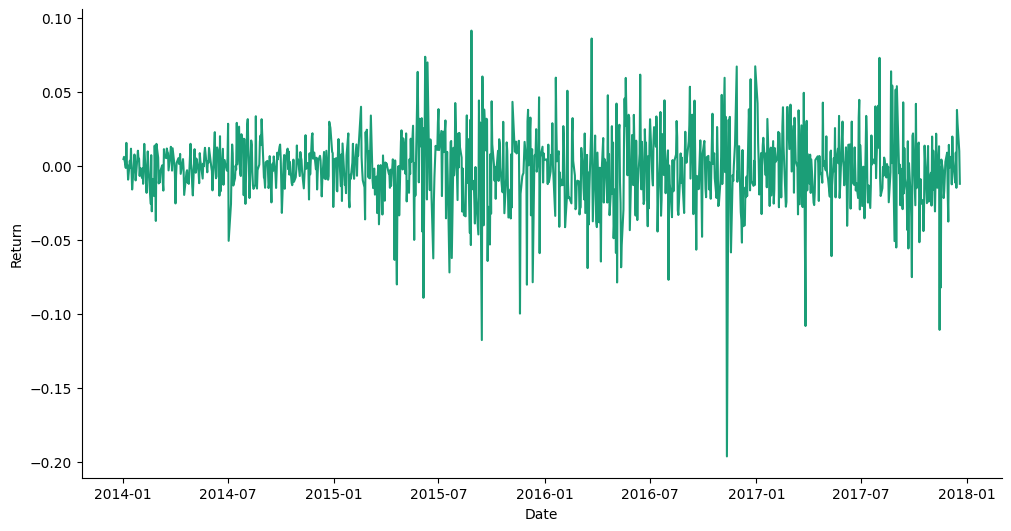

In [9]:
# @title Date vs Return

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Return']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Return')

**Overall Goal:**

The code is designed to estimate the Value at Risk (VaR) of a financial asset or portfolio using a technique called historical bootstrapping. VaR is a risk metric that tells you the maximum potential loss you could experience over a given time horizon with a certain level of confidence.

**Code Explanation:**

*Data Preparation*

data_boot = data[(data['Date'] < "2015-01-01")]: Filters your original data (data) to include only data points before January 1st, 2015. This assumes that your dataset has a 'Date' column.
N = data_boot.shape[0]: Stores the number of historical data points in your filtered dataset.
Bootstrap Sampling

boot_sample = pd.DataFrame(...): Creates a new DataFrame called boot_sample with two columns:
'Index': Contains indices 0 to 999 repeated N times (representing bootstrap iterations).
'Return': Contains N*1000 randomly sampled returns from your historical 'Return' data (sampled with replacement which is essential for bootstrapping).

*VaR Calculation Function*

def VaR(gains, c=0.99): ...: This defines a function to calculate VaR. It takes a set of returns (gains) and a confidence level (c, defaulting to 99%). Inside, it sorts the returns, calculates the appropriate index based on the confidence level, and returns the negative value at that index (representing potential loss).
Calculate VaRs for Bootstrap Samples

VaRs = np.array(boot_sample.groupby(["Index"])["Return"].apply(lambda x: VaR(x))):
Groups the boot_sample data by the 'Index' (i.e., by each bootstrap iteration).
For each group, it applies the VaR function to calculate VaR at the 99% confidence level.
Stores the results as a NumPy array named VaRs.
Visualization and Confidence Interval
plt.show(plt.hist(VaRs)): Creates a histogram of the calculated VaRs, giving you a visual understanding of the distribution of potential losses.
np.quantile(VaRs, [0.025, 0.975]): Calculates the 2.5% and 97.5% quantiles of the VaRs. This provides a confidence interval for your VaR estimate.

**In Summary:**  The code simulates potential scenarios based on your historical data, calculates VaR for each scenario, and provides insights into the distribution of possible losses and a range for your VaR estimate.


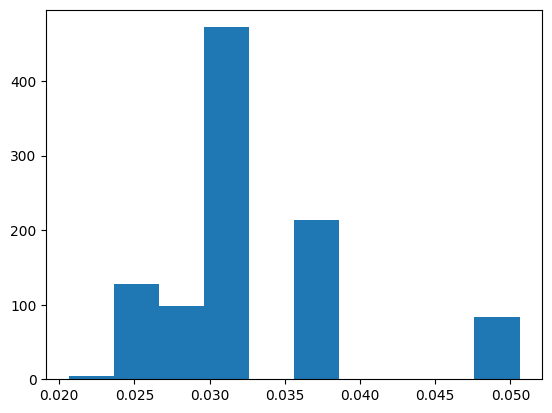

array([0.02550368, 0.05060242])

In [10]:
# Data up to 2015
data_boot = data[(data['Date'] < "2015-01-01")]
N = data_boot.shape[0]

# bootstrap = sample with replacement
boot_sample = pd.DataFrame({"Index": np.repeat(np.arange(start=0, stop=1000), N),
                            "Return": np.array(data_boot['Return'].sample(n=N*1000, replace=True))})



def VaR(gains, c=0.99):
    n = len(gains)
    sort = sorted(gains)
    VaR = -sort[math.ceil(n * (1-c))-1]
    return VaR

VaRs = np.array(boot_sample.groupby(["Index"])["Return"].apply(lambda x: VaR(x)))

plt.show(plt.hist(VaRs))
np.quantile(VaRs, [0.025, 0.975])


In [12]:
from numpy import array

In [13]:
array([0.02550368, 0.05060242])

array([0.02550368, 0.05060242])

FRM: Bootstrapping value at risk

https://www.youtube.com/watch?v=FFSDsTqopZ0

Blindly resampling the exponentially weighted Value at Risk (VaR) lacks utility due to the dynamic nature of the data-generating process. This dynamism is captured through assigning higher weights to recent observations. However, you can emulate this by resampling with exponential weights using tools like the sample function in R. Proceed similarly to the historical method, keeping in mind that while it mimics the approach, it's not a true bootstrap for exponentially weighted VaR; rather, it's a bootstrap for historical VaR where samples are generated with exponential weights.

A more genuine bootstrap for exponentially weighted VaR involves resampling akin to the historical method but retaining and reusing original weights when calculating VaR. Despite its proximity to the actual process, this method faces limitations, as weights may lack uniqueness and no longer sum to 1. It underscores the conceptual complexity even in seemingly straightforward processes like bootstrapping.

Alternatively, for a parametric approach, standard errors can be estimated using methods outlined in the slides. These standard errors can be computed for specific periods, like the first day of 2015, with ease extendable to every day in the sample.

In [19]:
import scipy
import numpy as np
from scipy.stats import norm

In [20]:
mu = data_boot['Return'].mean()
sigma = data_boot['Return'].std()
N = data_boot['Return'].count()
VaR = -(mu - sigma*scipy.stats.norm.ppf(0.99))
VaR
se = np.sqrt(0.99*0.01/N)/scipy.stats.norm.pdf(VaR, mu, sigma)
se

0.0035588240306040054

Based on the standard error, you can compute a 95% confidence interval through

[VaR − 1.96 × s. e. , VaR + 1.96 × s. e. ]

2. Model-building approach

Compute volatility using the EWMA with λ = 0.94. Compute the
corresponding measure of VaR.

<ipython-input-26-edab696aa42c>:17: RuntimeWarning: invalid value encountered in sqrt
  plt.plot_date(dates, -scipy.stats.norm.ppf(0.99) * np.sqrt(sigma2[1:]), linestyle='solid')


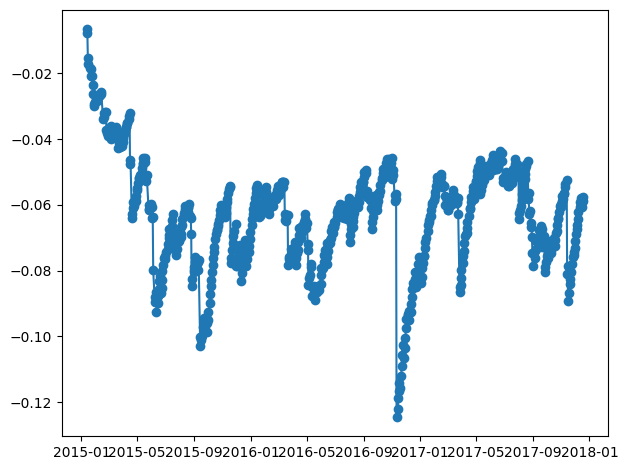

In [26]:
import matplotlib.pyplot as plt  # Add this line to import matplotlib
import matplotlib.dates as mdates  # Add this line to import the dates submodule

Lambda = 0.94
sigma0 = sum(np.array(data_boot['Return']) * (1 - Lambda) * Lambda ** np.arange(len(data_boot)))

# Then use the simple volatility updating
dta_post = data[(data['Date'] >= "2015-01-01")]
Ret2 = np.array(dta_post['Return']**2)
sigma2 = np.concatenate((np.array([sigma0]), np.zeros(len(Ret2))), axis=None)
for j in range(1, len(sigma2)):
    sigma2[j] = sigma2[j-1] * Lambda + Ret2[j-1] * (1 - Lambda)

# Visualize
dates = mdates.date2num(dta_post['Date'])  # Corrected the module reference
#plt.plot_date(dates, dta_post['Return'], linestyle='solid')
plt.plot_date(dates, -scipy.stats.norm.ppf(0.99) * np.sqrt(sigma2[1:]), linestyle='solid')
plt.tight_layout()
plt.show()


The following code uses ML to estimate the parameters of a GARCH(1,1) using the first year of data.

In [48]:
import numpy as np
from scipy.optimize import fmin

def logL(omega, alpha, beta, data):
    ret2 = data**2
    sigma0 = omega/(1-alpha-beta)
    sigma2 = np.concatenate((np.array([sigma0]), np.zeros(len(data))), axis=None)
    loglik = 0
    for t in range(0, len(data)):
        sigma2[t+1] = omega + alpha*ret2[t] + beta*sigma2[t]
        loglik = loglik - np.log(sigma2[t]) - ret2[t]/sigma2[t]
    return loglik

def tobeoptimized(param):
    return -logL(param[0], param[1], param[2], np.array(data_boot['Return']))

fmin(tobeoptimized, [1e-02, 0.3, 0.3])


<ipython-input-48-ad5c4dbfd62d>:11: RuntimeWarning: invalid value encountered in log
  loglik = loglik - np.log(sigma2[t]) - ret2[t]/sigma2[t]


Optimization terminated successfully.
         Current function value: -1962.664732
         Iterations: 174
         Function evaluations: 309


array([1.24000714e-05, 9.32235169e-02, 8.29500892e-01])

Compare the results from the two approaches.

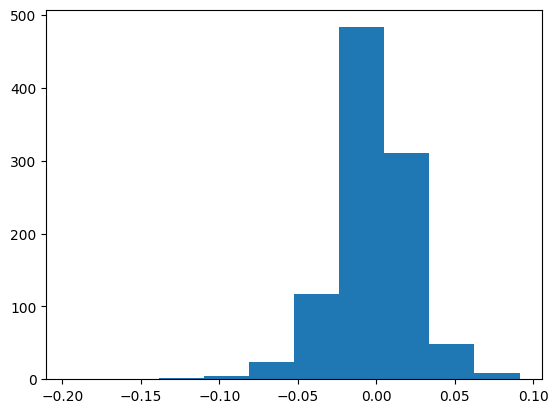

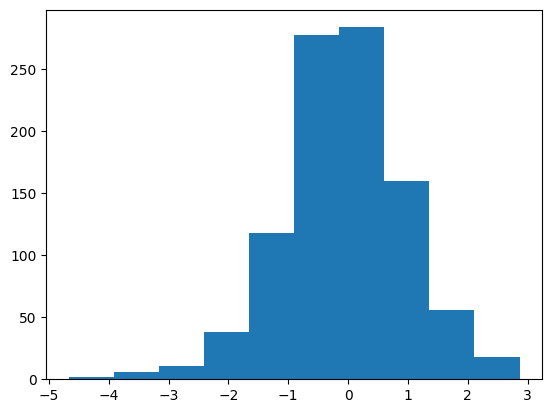

In [49]:
#Compute rolling volatility
rolling_vol=data.Return.rolling(30).std()
#Standardize returns
norm_rets=data.Return/rolling_vol
#Compare distributions
plt.show(plt.hist(data.Return))
plt.show(plt.hist(norm_rets))

Upon examining the standardized returns, it becomes evident that the distribution closely resembles a normal distribution. However, a noticeable feature persists: a thick left tail. Employing extreme value theory presents a potential solution to address this characteristic of the distribution.

#3

3. A mixed approach

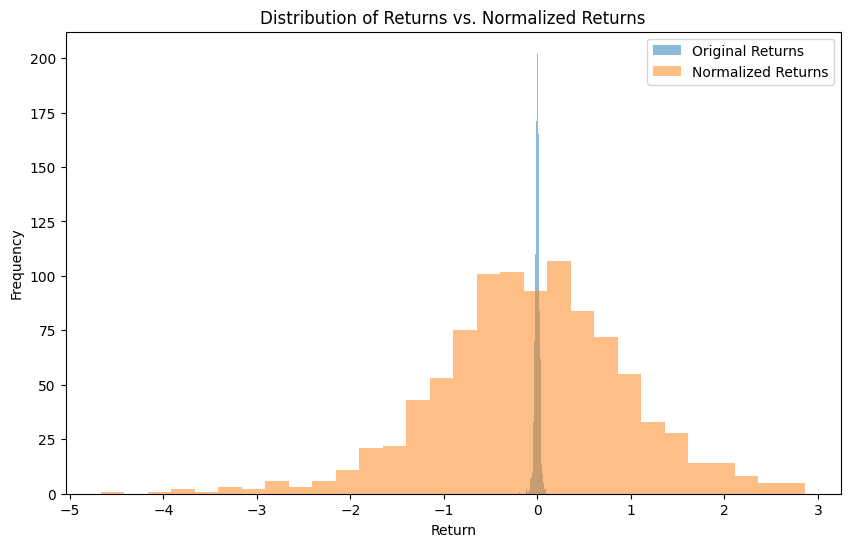

Mixed Approach VaR (1%): -2.9003822827120587


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('hw4_returns.csv', parse_dates=['Date'])

# Calculate rolling volatility for the previous month
data['Rolling_Volatility'] = data['Return'].rolling(window=30).std()

# Normalize gains with estimated volatility from the previous month
data['Normalized_Return'] = data['Return'] / data['Rolling_Volatility']

# Plot the distribution of normalized gains and original returns
plt.figure(figsize=(10, 6))
plt.hist(data['Return'], bins=30, alpha=0.5, label='Original Returns')
plt.hist(data['Normalized_Return'], bins=30, alpha=0.5, label='Normalized Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.title('Distribution of Returns vs. Normalized Returns')
plt.legend()
plt.show()

# Calculate VaR based on the mixed approach
if data['Normalized_Return'].dropna().shape[0] >= 100:
    mixed_var = np.percentile(data['Normalized_Return'].dropna(), q=1)
    print("Mixed Approach VaR (1%):", mixed_var)
else:
    print("Insufficient data points for quantile calculation.")


**Historical VaR:**
Utilize historical data to compute Value at Risk (VaR) for different confidence levels (e.g., 95%, 99%) using both the historical method and bootstrapping techniques.
Historical VaR provides a baseline estimate of potential losses based on past market behavior and is useful for short-term risk assessment.

**Exponentially Weighted Moving Average (EWMA):**
Implement an EWMA model with an appropriate decay factor (e.g., λ = 0.94) to capture the time-varying nature of volatility.
Compute VaR based on the EWMA volatility estimate to account for recent market dynamics and volatility clustering.

**Mixed Approach:**
Normalize gains with estimated volatility from the previous month to account for short-term market fluctuations.
Calculate VaR based on the mixed approach, incorporating both historical and recent volatility measures, offering a balanced view of risk.
GARCH Modeling (Optional):
Explore fitting a GARCH(1,1) model to the data to capture volatility clustering and time-varying volatility dynamics.
Use GARCH-based VaR estimates to complement existing approaches and provide additional insights into potential tail risks.

**Extreme Value Theory (EVT) (Optional):**
Investigate EVT methods to model extreme events and estimate tail risks more accurately.
EVT can offer insights into extreme market scenarios and tail risk exposures, enhancing the risk assessment process.
Justification:

**Comprehensive Risk Coverage:**
By combining multiple risk measurement techniques, we ensure a comprehensive assessment of potential losses, covering both short-term fluctuations and extreme market events.
Adaptability to Market Dynamics:
The use of EWMA and mixed approaches allows for adaptability to changing market conditions, capturing recent volatility trends and short-term fluctuations.

**Robustness and Accuracy:**
Leveraging statistical methods such as bootstrapping and GARCH modeling enhances the robustness and accuracy of risk estimates, providing traders with more reliable information for decision-making.
Tail Risk Assessment:
EVT offers insights into tail risks and extreme market scenarios, enabling proactive risk management strategies to mitigate potential losses during extreme events.

**Conclusion:**

Incorporating a multi-faceted approach to real-time risk measurement will empower the trading desk to make informed decisions and effectively manage the risk associated with trades. By leveraging historical data, statistical methods, and advanced modeling techniques, we can enhance risk assessment accuracy, adaptability to market dynamics, and readiness for extreme market events, ultimately optimizing trading performance and preserving capital.